# Predict CLTV of a customer - Regression Problem

* Problem Statement

VahanBima is one of the leading insurance companies in India. It provides motor vehicle insurances at best prices with 24/7 claim settlement.  It offers different types of policies for  both personal and commercial vehicles. It has established its brand across different regions in India. 

Around 90% of the businesses today use personalized services. The company wants to launch different personalized experience programs for customers of VahanBima. The personalized experience can be dedicated resources for claim settlement, different kinds of services at doorstep, etc. Inorder to do so, they would like to segment the customers into different tiers based on their customer lifetime value (CLTV).

Inorder to do it, they would like to predict the customer lifetime value based on the activity and interaction of the customer with the platform. So, as a part of this challenge, your task at hand is to build a high performance and interpretable machine learning model to predict the CLTV based on the user and policy data.

* About the Dataset

You are provided with the sample dataset of the company holding the information of customers and policy such as highest qualification of the user, total income earned by a customer in a year, employee status,  policy opted by the user, type of policy and so on and the target variable indicating the total customer lifetime value.

1. id-- Unique identifier of a customer
2. gender-- Gender of the customer
3. area-- Area of the customer
4. qualification-- Highest Qualification of the customer
5. income-- Income earned in a year (in rupees)
6. marital_status-- Marital Status of the customer {0:Single, 1: Married}
7. vintage-- No. of years since the first policy date
8. claim_amount-- Total Amount Claimed by the customer (in rupees)
9. num_policies-- Total no. of policies issued by the customer
10. policy-- Active policy of the customer
11. type_of_policy-- Type of active policy 
12. cltv-- Customer life time value (Target Variable)

In [106]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is AC64-25E6

 Directory of C:\Users\Paresh\OneDrive\Documents\Job-a-thon_JAN2023

22-01-2023  14:02    <DIR>          .
21-01-2023  12:00    <DIR>          ..
21-01-2023  12:08    <DIR>          .ipynb_checkpoints
22-01-2023  12:57    <DIR>          catboost_info
21-01-2023  19:02           985,883 cltv_predictions.csv
21-01-2023  12:08             5,721 How to Create Sample Submission File.ipynb
22-01-2023  14:02           262,280 Job-a-thon_JAN2023.ipynb
21-01-2023  12:06         1,538,872 sample_submission.csv
21-01-2023  11:55         3,861,619 test_koRSKBP.csv
21-01-2023  11:55         6,265,883 train_BRCpofr.csv
               6 File(s)     12,920,258 bytes
               4 Dir(s)  246,492,389,376 bytes free


In [3]:
# Reading the train and test data

train_data = pd.read_csv("train_BRCpofr.csv")
test_data = pd.read_csv("test_koRSKBP.csv")

# EDA - Exploratory Data Analysis

In [4]:
train_data.shape

(89392, 12)

In [5]:
test_data.shape

(59595, 11)

In [6]:
train_data.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [7]:
train_data.tail()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772
89391,89392,Female,Rural,High School,5L-10L,0,6,0,More than 1,B,Gold,108144


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [9]:
test_data.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [10]:
test_data.tail()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
59590,148983,Male,Rural,Bachelor,5L-10L,1,6,0,1,A,Silver
59591,148984,Male,Urban,High School,5L-10L,0,6,0,1,C,Gold
59592,148985,Female,Urban,High School,2L-5L,1,4,3323,More than 1,B,Platinum
59593,148986,Male,Rural,Bachelor,5L-10L,0,1,2886,More than 1,A,Silver
59594,148987,Female,Urban,Bachelor,5L-10L,1,4,5939,More than 1,B,Platinum


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59595 entries, 0 to 59594
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              59595 non-null  int64 
 1   gender          59595 non-null  object
 2   area            59595 non-null  object
 3   qualification   59595 non-null  object
 4   income          59595 non-null  object
 5   marital_status  59595 non-null  int64 
 6   vintage         59595 non-null  int64 
 7   claim_amount    59595 non-null  int64 
 8   num_policies    59595 non-null  object
 9   policy          59595 non-null  object
 10  type_of_policy  59595 non-null  object
dtypes: int64(4), object(7)
memory usage: 5.0+ MB


In [12]:
train_data.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4351.502416,97952.828978
std,25805.391969,0.494272,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,31894.000000,724068.000000


In [13]:
test_data.describe()

,id,marital_status,vintage,claim_amount
count,59595.000000,59595.000000,59595.000000,59595.000000
mean,119190.000000,0.576928,4.620304,4368.504321
std,17203.738983,0.494051,2.282511,3288.132408
min,89393.000000,0.000000,0.000000,0.000000
25%,104291.500000,0.000000,3.000000,2398.000000
50%,119190.000000,1.000000,5.000000,4106.000000
75%,134088.500000,1.000000,6.000000,6104.000000
max,148987.000000,1.000000,8.000000,32534.000000


### Categorical Features

In [14]:
# Extracting Categorical Features from the data
categorical_features=[feature for feature in train_data.columns if train_data[feature].dtypes == 'O']
print('Number of categorical features are {}'.format(len(categorical_features)))
categorical_features

Number of categorical features are 7


['gender',
 'area',
 'qualification',
 'income',
 'num_policies',
 'policy',
 'type_of_policy']

In [15]:
train_data[categorical_features].head()

,gender,area,qualification,income,num_policies,policy,type_of_policy
0,Male,Urban,Bachelor,5L-10L,More than 1,A,Platinum
1,Male,Rural,High School,5L-10L,More than 1,A,Platinum
2,Male,Urban,Bachelor,5L-10L,More than 1,A,Platinum
3,Female,Rural,High School,5L-10L,More than 1,A,Platinum
4,Male,Urban,High School,More than 10L,More than 1,A,Gold


In [16]:
# Lets print the number of uniques categories for each categorical feature
for feature in categorical_features:
    print('The feature {} contains {} number of uniques categories'.format(feature,len(train_data[feature].unique())))

The feature gender contains 2 number of uniques categories
The feature area contains 2 number of uniques categories
The feature qualification contains 3 number of uniques categories
The feature income contains 4 number of uniques categories
The feature num_policies contains 2 number of uniques categories
The feature policy contains 3 number of uniques categories
The feature type_of_policy contains 3 number of uniques categories


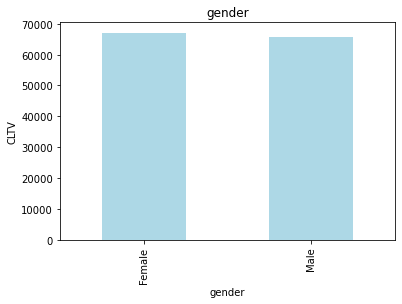

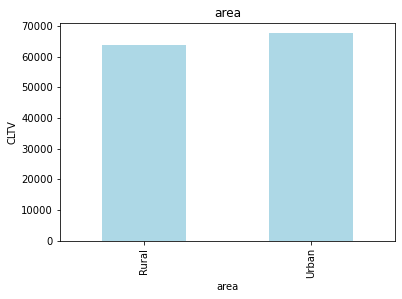

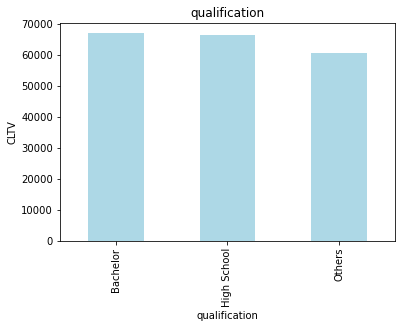

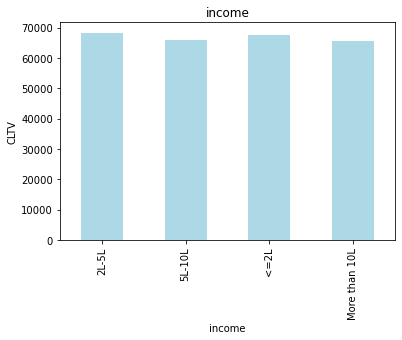

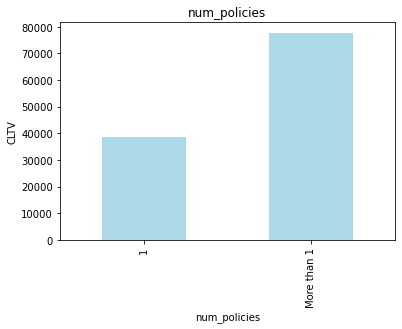

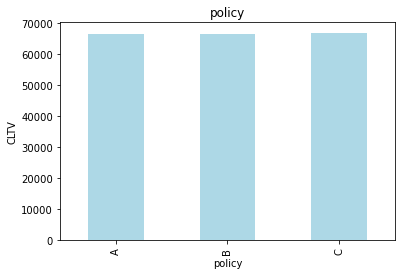

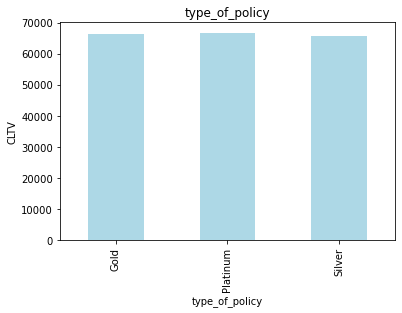

In [17]:
# Lets plot the categorical features vs SalePrice to see the relationship between them

for feature in categorical_features:
    data=train_data.copy()
    data.groupby(feature)['cltv'].median().plot.bar(color='lightblue')
    plt.xlabel(feature)
    plt.ylabel("CLTV")
    plt.title(feature)
    plt.show()

We have to convert the categorical variables into numerical with the help of one-hot-encoding.

### Numerical Discrete Features 

In [18]:
# Extracting the numerical features from the data
numerical_features = [feature for feature in train_data.columns if train_data[feature].dtypes != 'O']

print("Number of numerical features are: ",len(numerical_features))
numerical_features

Number of numerical features are:  5


['id', 'marital_status', 'vintage', 'claim_amount', 'cltv']

In [19]:
train_data[numerical_features].head()

,id,marital_status,vintage,claim_amount,cltv
0,1,1,5,5790,64308
1,2,0,8,5080,515400
2,3,1,8,2599,64212
3,4,0,7,0,97920
4,5,1,6,3508,59736


In [20]:
# Extracting discrete data from the numerical data based on the condition that length of unique should be <= 25

discrete_feature = [feature for feature in numerical_features if len(train_data[feature].unique())<25 and not feature=='id']
print("Discrete Variables Count: {}".format(len(discrete_feature)))
discrete_feature

Discrete Variables Count: 2


['marital_status', 'vintage']

In [21]:
train_data[discrete_feature].head()

,marital_status,vintage
0,1,5
1,0,8
2,1,8
3,0,7
4,1,6


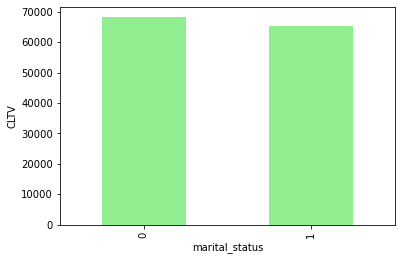

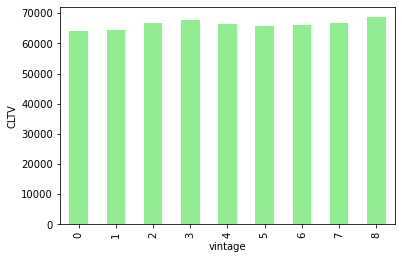

In [22]:
# Lets find the relationship between the discrete features and the sale price

for feature in discrete_feature:
    data = train_data.copy()
    data.groupby(feature)['cltv'].median().plot.bar(color='lightgreen')
    plt.xlabel(feature)
    plt.ylabel("CLTV")
    plt.show()

### Numerical Continuous Features

In [23]:
# Extracting continuos numerical data based on their datatype
continuos_feature = [feature for feature in numerical_features if feature not in discrete_feature and feature!='id'
                    and feature!='cltv']
print("Continuos Variables Count: {}".format(len(continuos_feature)))
continuos_feature

Continuos Variables Count: 1


['claim_amount']

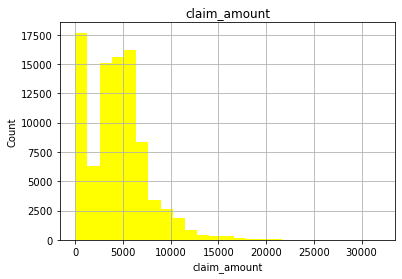

In [24]:
# Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuos_feature:
    data=train_data.copy()
    data[feature].hist(bins=25,color='yellow')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

As we can see that the 'claim_amount' feature is right skewed, we have to make some transformations to convert it to normal distribution.

### Outliers

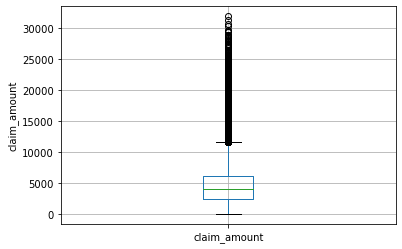

In [25]:
# Plotting a box plot to detect any outiers present in the data
for feature in continuos_feature:
    data=train_data.copy()
    #data[feature]=np.log(data[feature])
    
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.show()

There is a huge amount of outliers present in the data, which contributes largely to the data. So, it won't be wise to remove the outliers so we will keep them as it is.

# Data Preprocessing / Feature Engineering

In [26]:
# Splitting the features and target variable
y_train = train_data.iloc[:,-1]
x_train = train_data.iloc[:,:-1]
x_test = test_data

In [27]:
x_train.shape

(89392, 11)

In [28]:
y_train.shape

(89392,)

In [29]:
x_test.shape

(59595, 11)

In [30]:
y_train

0         64308
1        515400
2         64212
3         97920
4         59736
          ...  
89387     95736
89388     67596
89389    114120
89390     71772
89391    108144
Name: cltv, Length: 89392, dtype: int64

In [31]:
# Combining both train and test data to perform preprocessing of the data
df = pd.concat([x_train,x_test],axis=0).reset_index(drop=True)
df

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold
...,...,...,...,...,...,...,...,...,...,...,...
148982,148983,Male,Rural,Bachelor,5L-10L,1,6,0,1,A,Silver
148983,148984,Male,Urban,High School,5L-10L,0,6,0,1,C,Gold
148984,148985,Female,Urban,High School,2L-5L,1,4,3323,More than 1,B,Platinum
148985,148986,Male,Rural,Bachelor,5L-10L,0,1,2886,More than 1,A,Silver


In [32]:
# Checking the number of unique values in each category

for feature in ['gender','area','qualification','income','marital_status','vintage','num_policies','policy','type_of_policy']:
    print(feature,df[feature].unique())
    print("========================================")

gender ['Male' 'Female']
area ['Urban' 'Rural']
qualification ['Bachelor' 'High School' 'Others']
income ['5L-10L' 'More than 10L' '2L-5L' '<=2L']
marital_status [1 0]
vintage [5 8 7 6 1 0 3 4 2]
num_policies ['More than 1' '1']
policy ['A' 'C' 'B']
type_of_policy ['Platinum' 'Gold' 'Silver']


* The data contains 7 categorical features such as 'gender', 'area', 'qualification', 'income', 'num_policies', 'policy', 'type_of_policy' which we will be converting to numerical features using one-hot-encoding.
* The data consist 2 numerical discrete features such as 'marital_status' and 'vintage'.
* The data consist 1 numerical continuous features is 'claim_amount'

In [33]:
# Checking for null values
df.isna().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
dtype: int64

The data does not contain any null values.

<AxesSubplot:>

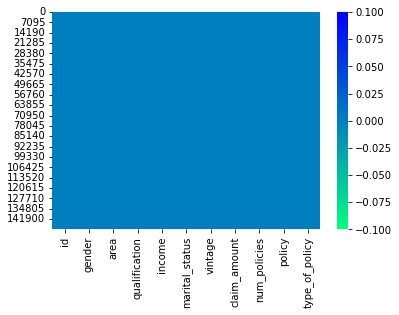

In [34]:
# Visualization for null values
sns.heatmap(df.isna(),cmap='winter_r')

In [35]:
# Performing label encoding

from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

for feature in categorical_features:
    df[feature]=label_encoder.fit_transform(df[feature])

In [36]:
df

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,1,1,1,0,1,1,5,5790,1,0,1
1,2,1,0,1,1,0,8,5080,1,0,1
2,3,1,1,0,1,1,8,2599,1,0,1
3,4,0,0,1,1,0,7,0,1,0,1
4,5,1,1,1,3,1,6,3508,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
148982,148983,1,0,0,1,1,6,0,0,0,2
148983,148984,1,1,1,1,0,6,0,0,2,0
148984,148985,0,1,1,0,1,4,3323,1,1,1
148985,148986,1,0,0,1,0,1,2886,1,0,2


In [37]:
# Dropping the id column since it is not needed for the time being
df.drop(columns='id',inplace=True)

In [38]:
# Scaling/Normalizing the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [39]:
df

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,1.0,1.0,0.0,0.333333,1.0,0.625,0.177968,1.0,0.0,0.5
1,1.0,0.0,0.5,0.333333,0.0,1.000,0.156144,1.0,0.0,0.5
2,1.0,1.0,0.0,0.333333,1.0,1.000,0.079886,1.0,0.0,0.5
3,0.0,0.0,0.5,0.333333,0.0,0.875,0.000000,1.0,0.0,0.5
4,1.0,1.0,0.5,1.000000,1.0,0.750,0.107826,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
148982,1.0,0.0,0.0,0.333333,1.0,0.750,0.000000,0.0,0.0,1.0
148983,1.0,1.0,0.5,0.333333,0.0,0.750,0.000000,0.0,1.0,0.0
148984,0.0,1.0,0.5,0.000000,1.0,0.500,0.102139,1.0,0.5,0.5
148985,1.0,0.0,0.0,0.333333,0.0,0.125,0.088707,1.0,0.0,1.0


In [40]:
# Splitting again into train annd test

x_train=df.iloc[:len(train_data),:]
x_test=df.iloc[len(train_data):,:]

In [41]:
x_train

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,1.0,1.0,0.0,0.333333,1.0,0.625,0.177968,1.0,0.0,0.5
1,1.0,0.0,0.5,0.333333,0.0,1.000,0.156144,1.0,0.0,0.5
2,1.0,1.0,0.0,0.333333,1.0,1.000,0.079886,1.0,0.0,0.5
3,0.0,0.0,0.5,0.333333,0.0,0.875,0.000000,1.0,0.0,0.5
4,1.0,1.0,0.5,1.000000,1.0,0.750,0.107826,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
89387,1.0,0.0,0.5,1.000000,0.0,0.750,0.000000,1.0,0.5,0.5
89388,1.0,1.0,0.0,0.333333,1.0,0.000,0.119782,1.0,0.0,0.5
89389,0.0,1.0,0.0,0.333333,0.0,0.500,0.103369,1.0,0.5,0.5
89390,0.0,0.0,0.5,0.000000,0.0,1.000,0.000000,1.0,0.5,0.5


In [42]:
x_test

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
89392,0.0,0.0,0.5,0.333333,0.0,0.750,0.065593,1.0,0.5,1.0
89393,0.0,1.0,0.5,0.000000,0.0,0.500,0.126083,1.0,0.0,0.5
89394,1.0,0.0,0.5,0.333333,1.0,0.875,0.089906,1.0,0.5,0.0
89395,0.0,0.0,0.0,1.000000,1.0,0.250,0.000000,1.0,0.5,1.0
89396,0.0,1.0,0.5,0.000000,0.0,0.625,0.432133,1.0,0.5,1.0
...,...,...,...,...,...,...,...,...,...,...
148982,1.0,0.0,0.0,0.333333,1.0,0.750,0.000000,0.0,0.0,1.0
148983,1.0,1.0,0.5,0.333333,0.0,0.750,0.000000,0.0,1.0,0.0
148984,0.0,1.0,0.5,0.000000,1.0,0.500,0.102139,1.0,0.5,0.5
148985,1.0,0.0,0.0,0.333333,0.0,0.125,0.088707,1.0,0.0,1.0


In [43]:
y_train

0         64308
1        515400
2         64212
3         97920
4         59736
          ...  
89387     95736
89388     67596
89389    114120
89390     71772
89391    108144
Name: cltv, Length: 89392, dtype: int64

# Splitting training data into training & validation data

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
# Splitting training data further into 2- train and validation
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.3,random_state=8)

In [46]:
print(x_train.shape,y_train.shape)

(62574, 10) (62574,)


In [47]:
print(x_val.shape,y_val.shape)

(26818, 10) (26818,)


We will train the data on x_train and y_tain and test the data on the validation set.

# Model Creation

In [49]:
# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
import xgboost 
import catboost
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

# Evaluation metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

### Linear Regression

In [50]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
lr_train_pred=lr_model.predict(x_train)
lr_val_pred=lr_model.predict(x_val)

In [51]:
lr_train_r2 = r2_score(y_train,lr_train_pred)
lr_train_r2

0.14766910024866775

In [52]:
lr_val_r2 = r2_score(y_val,lr_val_pred)
lr_val_r2

0.15296863119111026

In [53]:
lr_mse=MSE(y_train,lr_train_pred)
lr_mse

7002353175.266219

In [54]:
lr_mae=MAE(y_train,lr_train_pred)
lr_mae

51523.47141396443

In [55]:
# Linear Regression is not performing well

### Decision Tree Regressor

In [56]:
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(x_train,y_train)
dt_train_pred=dt_model.predict(x_train)
dt_val_pred=dt_model.predict(x_val)

In [57]:
dt_train_r2 = r2_score(y_train,dt_train_pred)
dt_train_r2

0.9456028010122433

In [58]:
dt_val_r2 = r2_score(y_val,dt_val_pred)
dt_val_r2

-0.757943698584228

In [59]:
dt_mse=MSE(y_train,dt_train_pred)
dt_mse

446902017.9470633

In [60]:
dt_mae=MAE(y_train,dt_train_pred)
dt_mae

4720.376752832426

### Random Forest Regressor

In [61]:
rf_model = RandomForestRegressor(n_estimators=500,random_state=0)
rf_model.fit(x_train,y_train)
rf_train_pred=rf_model.predict(x_train)
rf_val_pred=rf_model.predict(x_val)

In [62]:
rf_train_r2 = r2_score(y_train,rf_train_pred)
rf_train_r2

0.8267477009023815

In [63]:
rf_val_r2 = r2_score(y_val,rf_val_pred)
rf_val_r2

0.044856290000015564

In [64]:
rf_mse=MSE(y_train,rf_train_pred)
rf_mse

1423360090.6201162

In [65]:
rf_mae=MAE(y_train,rf_train_pred)
rf_mae

22992.929084470386

### Ridge Regressor

In [66]:
r_model = Ridge(random_state=0)
r_model.fit(x_train,y_train)
r_train_pred=r_model.predict(x_train)
r_val_pred=r_model.predict(x_val)

In [67]:
r_train_r2=r2_score(y_train,r_train_pred)
r_train_r2

0.14766906726964402

In [68]:
r_val_r2=r2_score(y_val,r_val_pred)
r_val_r2

0.15296719094083866

In [69]:
r_mse=MSE(y_train,r_train_pred)
r_mse

7002353446.206497

In [70]:
r_mae=MAE(y_train,r_train_pred)
r_mae

51522.85587990758

### XGBoost 

In [71]:
xgb_model = XGBRegressor(n_estimators=500,learning_rate=0.01)
xgb_model.fit(x_train,y_train)
xgb_train_pred=xgb_model.predict(x_train)
xgb_val_pred=xgb_model.predict(x_val)

In [72]:
xgb_train_r2=r2_score(y_train,xgb_train_pred)
xgb_train_r2

0.18358644691775672

In [73]:
xgb_val_r2 = r2_score(y_val,xgb_val_pred)
xgb_val_r2

0.16231768533513313

In [74]:
xgb_mse=MSE(y_train,xgb_train_pred)
xgb_mse

6707273005.617542

In [75]:
xgb_mae=MAE(y_train,xgb_train_pred)
xgb_mae

49518.40011570051

### AdaBoost Regressor

In [76]:
ada_model=AdaBoostRegressor(n_estimators=1000,learning_rate=4,random_state=0)
ada_model.fit(x_train,y_train)
ada_train_pred=ada_model.predict(x_train)
ada_val_pred=ada_model.predict(x_val)

In [77]:
ada_train_r2=r2_score(y_train,ada_train_pred)
ada_train_r2

0.14968119265803603

In [78]:
ada_val_r2=r2_score(y_val,ada_val_pred)
ada_val_r2

0.15483630101090096

### Bagging Regressor

In [79]:
bag_model=BaggingRegressor(n_estimators=1000,random_state=0)
bag_model.fit(x_train,y_train)
bag_train_pred=bag_model.predict(x_train)
bag_val_pred=bag_model.predict(x_val)

In [80]:
bag_train_r2=r2_score(y_train,bag_train_pred)
bag_train_r2

0.8270960418668067

In [81]:
bag_val_r2=r2_score(y_val,bag_val_pred)
bag_val_r2

0.04615942001317841

### CatBoost Regressor

In [125]:
cat_model=CatBoostRegressor(iterations=100,learning_rate=0.05,l2_leaf_reg=5,depth=6,random_state=0,verbose=0)
cat_model.fit(x_train,y_train)
cat_train_pred=cat_model.predict(x_train)
cat_val_pred=cat_model.predict(x_val)

In [126]:
cat_train_r2 = r2_score(y_train,cat_train_pred)
cat_train_r2

0.16406418789997768

In [127]:
cat_val_r2=r2_score(y_val,cat_val_pred)
cat_val_r2

0.16499256695461872

### Gradient Boosting Regressor

In [85]:
gbr_model=GradientBoostingRegressor(loss='squared_error',learning_rate=0.05,n_estimators=200,random_state=0)
gbr_model.fit(x_train,y_train)
gbr_train_pred=gbr_model.predict(x_train)
gbr_val_pred=gbr_model.predict(x_val)

In [86]:
gbr_train_r2 = r2_score(y_train,gbr_train_pred)
gbr_train_r2

0.16594218189907828

In [87]:
gbr_val_r2=r2_score(y_val,gbr_val_pred)
gbr_val_r2

0.1643639680027179

# Results of training and validation set

In [105]:
# Creating a dataframe showing the r2_score for both training and validation data
results=pd.DataFrame({
                    'Models':['Linear Regression','Decision Tree','Random Forest','Ridge Regressor',
                              'XGBoost','AdaBoost','Bagging Regressor','CatBoost','GradientBoost'],
    
                    'train_Score':[lr_train_r2, dt_train_r2, rf_train_r2, r_train_r2,
                              xgb_train_r2, ada_train_r2, bag_train_r2, cat_train_r2, gbr_train_r2],
    
                    'val_Score':[lr_val_r2, dt_val_r2, rf_val_r2, r_val_r2,
                              xgb_val_r2, ada_val_r2, bag_val_r2, cat_val_r2, gbr_val_r2],
                     })

In [92]:
results.sort_values('val_Score',ascending=False,ignore_index=True)

,Models,train_Score,val_Score
0,CatBoost,0.164064,0.164993
1,GradientBoost,0.165942,0.164364
2,XGBoost,0.183586,0.162318
3,AdaBoost,0.149681,0.154836
4,Linear Regression,0.147669,0.152969
5,Ridge Regressor,0.147669,0.152967
6,Bagging Regressor,0.827096,0.046159
7,Random Forest,0.826748,0.044856
8,Decision Tree,0.945603,-0.757944


As we can see, the catboost regressor is performing the best on the validation data. 

# Final Model

In [94]:
# Retaining our original train and test data
X_train=df.iloc[:len(train_data),:]
X_test=df.iloc[len(train_data):,:]
Y_train = train_data.iloc[:,-1]

In [95]:
X_train

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,1.0,1.0,0.0,0.333333,1.0,0.625,0.177968,1.0,0.0,0.5
1,1.0,0.0,0.5,0.333333,0.0,1.000,0.156144,1.0,0.0,0.5
2,1.0,1.0,0.0,0.333333,1.0,1.000,0.079886,1.0,0.0,0.5
3,0.0,0.0,0.5,0.333333,0.0,0.875,0.000000,1.0,0.0,0.5
4,1.0,1.0,0.5,1.000000,1.0,0.750,0.107826,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
89387,1.0,0.0,0.5,1.000000,0.0,0.750,0.000000,1.0,0.5,0.5
89388,1.0,1.0,0.0,0.333333,1.0,0.000,0.119782,1.0,0.0,0.5
89389,0.0,1.0,0.0,0.333333,0.0,0.500,0.103369,1.0,0.5,0.5
89390,0.0,0.0,0.5,0.000000,0.0,1.000,0.000000,1.0,0.5,0.5


In [96]:
X_test

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
89392,0.0,0.0,0.5,0.333333,0.0,0.750,0.065593,1.0,0.5,1.0
89393,0.0,1.0,0.5,0.000000,0.0,0.500,0.126083,1.0,0.0,0.5
89394,1.0,0.0,0.5,0.333333,1.0,0.875,0.089906,1.0,0.5,0.0
89395,0.0,0.0,0.0,1.000000,1.0,0.250,0.000000,1.0,0.5,1.0
89396,0.0,1.0,0.5,0.000000,0.0,0.625,0.432133,1.0,0.5,1.0
...,...,...,...,...,...,...,...,...,...,...
148982,1.0,0.0,0.0,0.333333,1.0,0.750,0.000000,0.0,0.0,1.0
148983,1.0,1.0,0.5,0.333333,0.0,0.750,0.000000,0.0,1.0,0.0
148984,0.0,1.0,0.5,0.000000,1.0,0.500,0.102139,1.0,0.5,0.5
148985,1.0,0.0,0.0,0.333333,0.0,0.125,0.088707,1.0,0.0,1.0


In [97]:
Y_train

0         64308
1        515400
2         64212
3         97920
4         59736
          ...  
89387     95736
89388     67596
89389    114120
89390     71772
89391    108144
Name: cltv, Length: 89392, dtype: int64

In [128]:
# Creating final model based on the results and training it and making the predictions
final_model = CatBoostRegressor(iterations=100,learning_rate=0.05,l2_leaf_reg=5,depth=6,random_state=0,verbose=0)
final_model.fit(X_train,Y_train)
predictions = final_model.predict(X_test)

In [129]:
predictions

array([ 93156.73421877, 128108.5649    ,  95024.09120424, ...,
       107012.88560903, 105063.35073174, 116122.42735343])

In [130]:
# Saving the predictions in a dataframe
final_result=pd.DataFrame({'id':test_data['id'],'cltv':predictions})

In [131]:
final_result

,id,cltv
0,89393,93156.734219
1,89394,128108.564900
2,89395,95024.091204
3,89396,88872.022390
4,89397,137405.552014
...,...,...
59590,148983,48307.284635
59591,148984,54025.462386
59592,148985,107012.885609
59593,148986,105063.350732


In [132]:
filename = 'cltv_predictions_5.csv'

final_result.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: cltv_predictions_5.csv
